<div style="background-color:#F4F4F4; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 5px #888888;">
    <img src="C:\\Users\\MR.AK THE BOSS\\OneDrive - unime.it\\Desktop\\cruckat company logo.png" alt="Company Logo" style="float:left; margin-right: 20px; width: 100px; height: 100px;">
    <h1 style="color:#002F6C; text-align:center;">Worldwide Wine Production Analysis and Insights </h1>
   <h3 style="color:#002F6C; text-align:center;">From 1835 to 2022 years data</h3>
   <p style="font-style: italic; color:#002F6C; text-align:center;">Research data from University of Adelaide</p>
   <hr style="border: 1px solid #002F6C;">
   <div style="display: flex; justify-content: space-between; margin-top: 15px;">
      <div>
         <p><strong style="color:#002F6C;">Recruiter:</strong></p>
         <p style="color:#002F6C;">Paola Jafrancesco</p>
         <p style="color:#002F6C;">Email: jafrancesco.paola@gmail.com</p>
      </div>
      <div style="margin-left: auto;">
         <p><strong style="color:#002F6C;">Candidate:</strong></p>
         <p style="color:#002F6C;">Lead Data Scientist</p>
         <p style="color:#002F6C;">Jaheer Hussain Aashik Ahamath</p>
         <p style="color:#002F6C;">Phone: +393245556896</p>
         <p style="color:#002F6C;">Email: aashikspl@gmail.com</p>
      </div>
   </div>
   <hr style="border: 1px solid #002F6C;">
   <p style="color:#002F6C; text-align:center;">Date: January 17th,2024</p>
</div>


In [52]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller


In [73]:
file_path = 'C:\\Users\\MR.AK THE BOSS\\Downloads\\Volume of wine production from 1835 to 2022 years - Sheet1.csv'
wine_data = pd.read_csv(file_path, header=1)
wine_data.rename(columns={wine_data.columns[0]: 'Year'}, inplace=True)
wine_data.set_index('Year', inplace=True)

#Cleaning the data by dropping rows where the year is missing

In [54]:
wine_data_cleaned = wine_data.dropna(how='all')

In [72]:
wine_data

,France,Italy,Portugal,Spain,Austria,Bel-Lux,Denmark,Finland,Germany,Greece,...,Japan,Korea,Malaysia,Philippines,Singapore,Taiwan,Thailand,Other Asia Pacific,Other,World
Year,,,,,,,,,,,,,,,,,,,,,
1835,2669460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1836,3139583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1837,3834476,NaN,NaN,NaN,119280.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1838,2547320,NaN,308900.0,NaN,123015.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1839,2676487,NaN,295700.0,NaN,122000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,4920000,5490000.0,606000.0,4493300.0,275348.0,16000.0,NaN,NaN,1026800.0,223500.0,...,17000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29400000.0
2019,4210000,3370000.0,652700.0,3367600.0,246500.0,16000.0,NaN,NaN,821800.0,242500.0,...,17000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25800000.0
2020,4666600,4906600.0,641800.0,4094900.0,239800.0,NaN,NaN,NaN,840500.0,228300.0,...,17000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26275800.0


#Finding the latest year available in the data and Extracting the data for the latest year and sorting the countries

In [55]:
latest_year = wine_data_cleaned.index.max()
latest_year_data = wine_data_cleaned.loc[latest_year]
top_5_countries = latest_year_data.drop('World').sort_values(ascending=False).head(5)

# Top 5 wine-producing countries

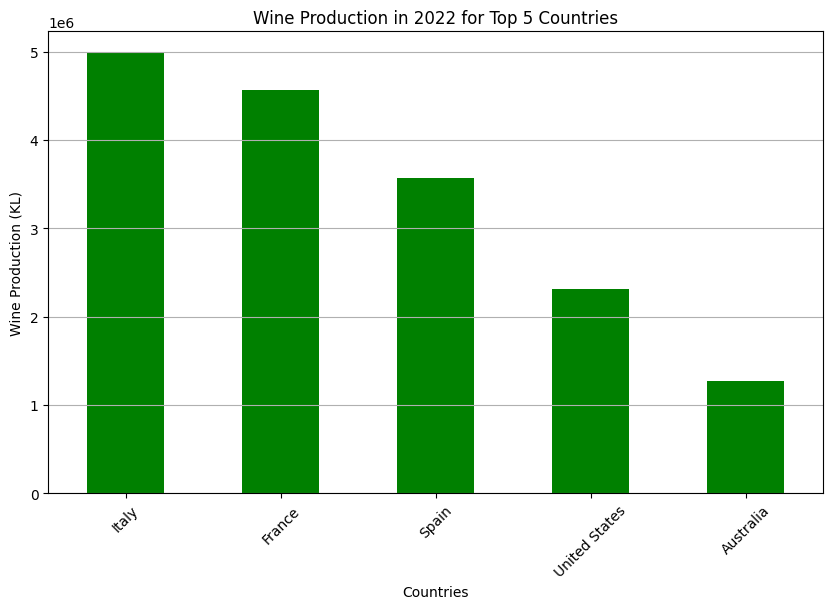

In [56]:
plt.figure(figsize=(10, 6))
top_5_countries.plot(kind='bar', color='green')
plt.title(f'Wine Production in {latest_year} for Top 5 Countries')
plt.ylabel('Wine Production (KL)')
plt.xlabel('Countries')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Analysing the Flow of data by comparing with other three Top Countries

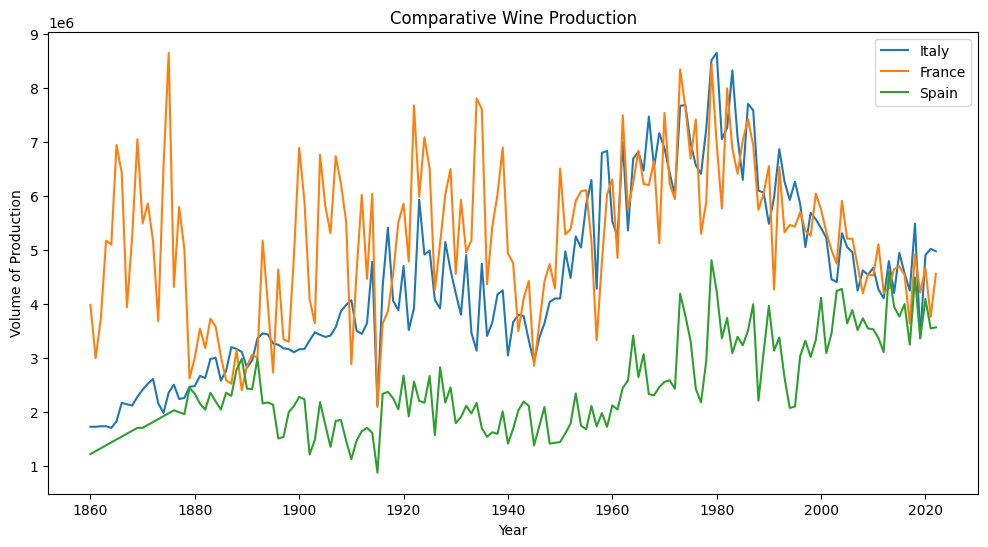

In [58]:
selected_countries = ['Italy', 'France', 'Spain']
wine_data[selected_countries].dropna().astype(float).plot(figsize=(12, 6))
plt.title('Comparative Wine Production')
plt.xlabel('Year')
plt.ylabel('Volume of Production')
plt.legend(selected_countries)
plt.show()


# Forcasting the Production data to fit and forecast using ARIMA model

In [59]:
def forecast_arima(series, order, steps=5):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

In [62]:
top_3_countries = top_5_countries.head(3).index
forecasts = {}

for country in top_3_countries:
    series = wine_data_cleaned[country].dropna()

    # trying with order (p, d, q) as (1, 1, 1) - for trail purpose
    forecast = forecast_arima(series, order=(1, 1, 1))
    forecasts[country] = forecast

for country, forecast in forecasts.items():
    print(f"Forecast for {country}:")
    print(forecast)

Forecast for Italy:
163    4.805729e+06
164    4.812659e+06
165    4.812383e+06
166    4.812394e+06
167    4.812394e+06
Name: predicted_mean, dtype: float64
Forecast for France:
188    4.424475e+06
189    4.396949e+06
190    4.391359e+06
191    4.390223e+06
192    4.389993e+06
Name: predicted_mean, dtype: float64
Forecast for Spain:
163    3.681465e+06
164    3.702964e+06
165    3.707111e+06
166    3.707910e+06
167    3.708065e+06
Name: predicted_mean, dtype: float64


# Data Visualization of Focasting Top Three Countries values

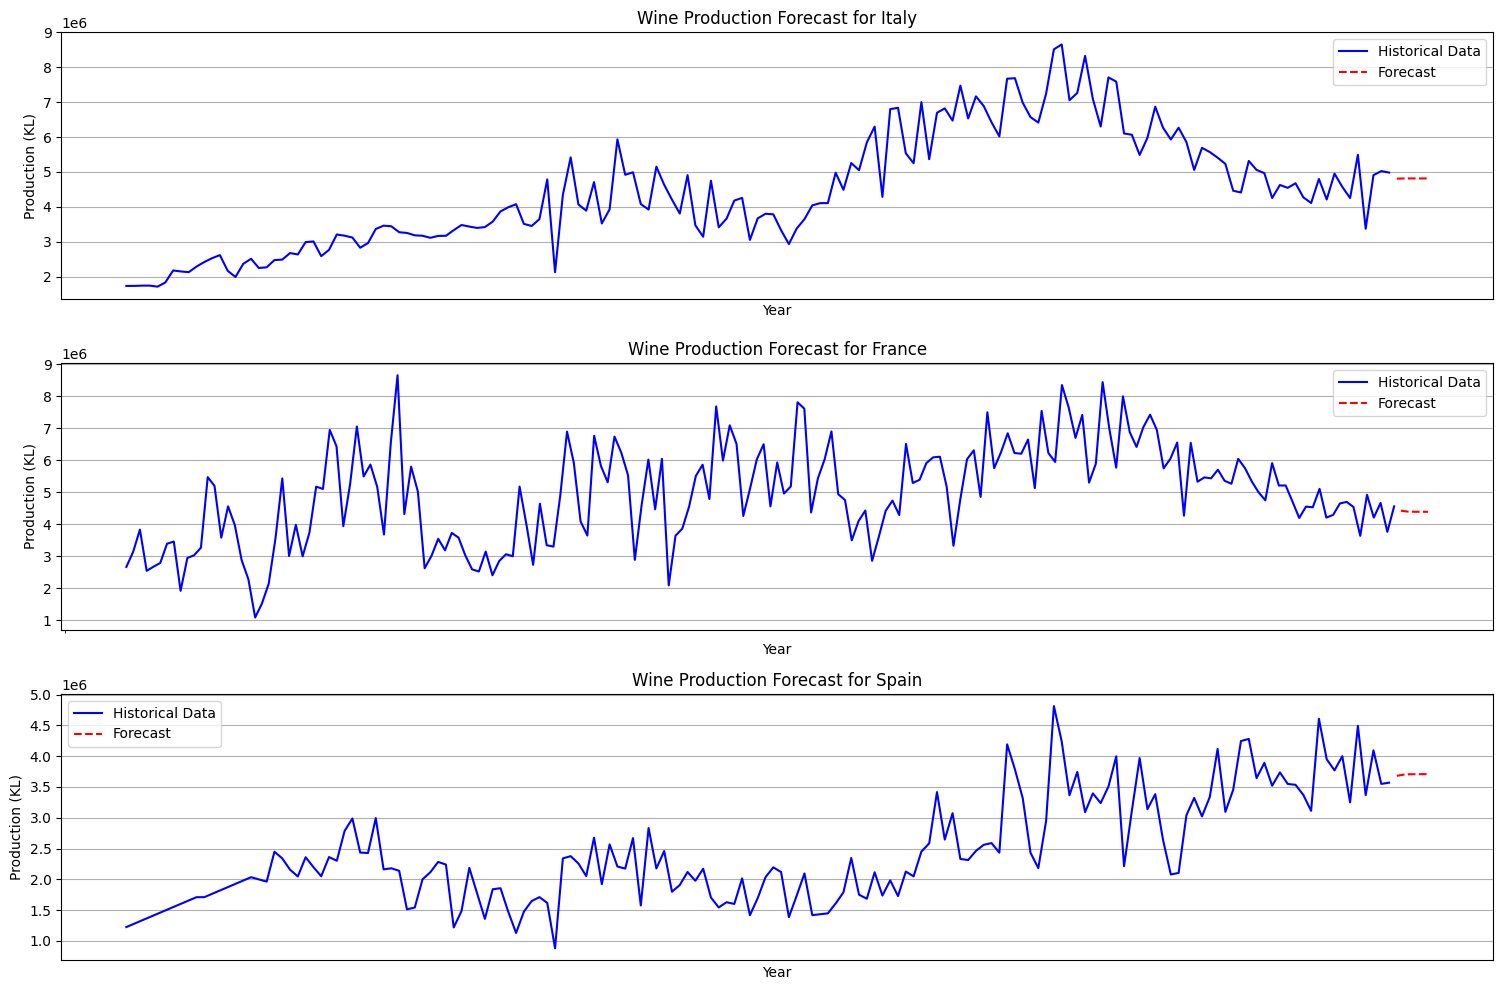

In [70]:
plt.figure(figsize=(15, 10))
for i, (country, forecast) in enumerate(forecasts.items()):
    plt.subplot(3, 1, i + 1)
    
    # Historical data
    series = wine_data_cleaned[country].dropna()
    plt.plot(series.index, series, label='Historical Data', color='blue')
    
    # Forecast data
    forecast_years = range(int(series.index.max()) + 1, int(series.index.max()) + 1 + len(forecast))
    plt.plot(forecast_years, forecast, label='Forecast', color='red', linestyle='dashed')
    
    plt.title(f'Wine Production Forecast for {country}')
    plt.xlabel('Year')
    plt.ylabel('Production (KL)')
    plt.legend()
    plt.grid(True)
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(10))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_minor_locator(mdates.YearLocator(1))
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()





# Evaluate the performance of time series forecasting ARIMA model

In [71]:
def calculate_forecast_accuracy_metrics(actual, forecast):
    mse = mean_squared_error(actual, forecast)
    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "MAPE": mape}

# Italy data
country = 'Italy'
series = wine_data_cleaned[country].dropna()

split_point = int(len(series) * 0.8)  # 80% for training, 20% for testing
train, test = series[:split_point], series[split_point:]
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))
metrics = calculate_forecast_accuracy_metrics(test, forecast)
print(f"Accuracy Metrics for {country}:")
print(metrics)


Accuracy Metrics for Italy:
{'MAE': 1590186.637487241, 'MSE': 3023004765676.1304, 'RMSE': 1738679.0289401119, 'MAPE': nan}


# Evaluation of ARIMA Model for Forecasting Wine Production in Italy

## Model Accuracy Metrics:

<div style="background-color:#F4F4F4; padding: 10px; margin: 10px;">
   <strong>1. Mean Absolute Error (MAE):</strong>
   Our model exhibited a MAE of 1,590,186.64 kiloliters, indicating that, on average, the model's forecasts deviated from the actual production figures by approximately 1.59 million kiloliters.
</div>

<div style="background-color:#F4F4F4; padding: 10px; margin: 10px;">
   <strong>2. Mean Squared Error (MSE):</strong>
   The MSE was calculated to be 3,023,004,765,676.13 kiloliters squared. This high value signifies a sudden variance in the model prediction errors.
</div>

<div style="background-color:#F4F4F4; padding: 10px; margin: 10px;">
   <strong>3. Root Mean Squared Error (RMSE):</strong>
   The RMSE was found to be 1,738,679.03 kiloliters. Similar to the MAE, this metric underscores a significant average deviation in the forecasts, showing that the model might not be capturing all the detailed parts of Italy's wine production trends.
</div>

<div style="background-color:#F4F4F4; padding: 10px; margin: 10px;">
   <strong>4. Mean Absolute Percentage Error (MAPE):</strong>
   The MAPE yielded a NaN result, likely due to the presence of zero or missing values in the actual production data. This limitation may affect the calculation of a percentage-based error metric.
</div>

The high values of MAE and RMSE suggest that the model, in its current state, may not be properly capturing the patterns and fluctuations in Italy's wine production data. The NaN in MAPE further suggests potential data quality issues, such as missing or zero production values, which need to be addressed for a more accurate forecast.


In [66]:
# Checking for zero values in the series
zero_values = series[series == 0]
print("Zero Values in Data:", zero_values)


Zero Values in Data: Series([], Name: Italy, dtype: float64)


#The presence of zero values in our time series data, is 0

# Trying with Automated parameter selection tools and Stationarity checks

In [74]:
def test_stationarity(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    return dftest[1]  # p-value

# Italy data
country = 'Italy'
series = wine_data_cleaned[country].dropna()

p_value = test_stationarity(series)
if p_value > 0.05:
    series = series.diff().dropna()
auto_model = auto_arima(series, seasonal=False, trace=True,
                        error_action='ignore', suppress_warnings=True)
split_point = int(len(series) * 0.8)
train, test = series[:split_point], series[split_point:]

model = ARIMA(train, order=auto_model.order)
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))
metrics = calculate_forecast_accuracy_metrics(test, forecast)
print(f"Accuracy Metrics for {country}:")
print(metrics)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4787.951, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4853.157, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4827.656, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4795.394, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=4793.491, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4785.912, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4797.129, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4788.599, Time=0.01 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=4787.908, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=4787.158, Time=0.03 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=4788.158, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4787.009, Time=0.05 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 0.707 seconds
Accuracy Metrics for Italy:
{'MAE': 600268.0104285869, 'MSE': 604187049401.8186, 'RMSE':

# Generating forecasts for the next 5 years

In [68]:
# Fitting updated the ARIMA(2,0,1) model
model_italy = ARIMA(series_italy, order=(2, 0, 1))
model_fit_italy = model_italy.fit()


italy_forecast = model_fit_italy.forecast(steps=5)
print("Forecast for Italy for the next 5 years:")
print(italy_forecast)


Forecast for Italy for the next 5 years:
163    4.794788e+06
164    4.800512e+06
165    4.796959e+06
166    4.793888e+06
167    4.790823e+06
Name: predicted_mean, dtype: float64


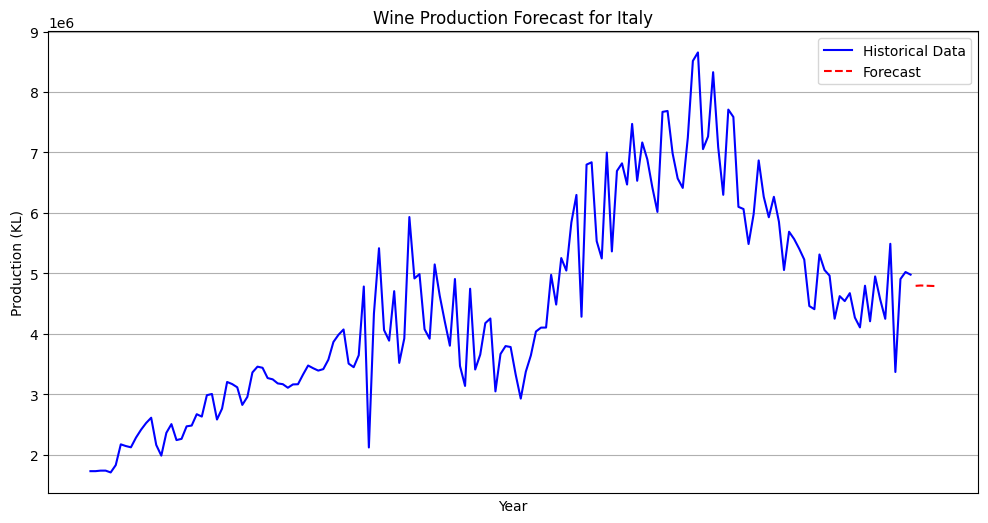

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(series_italy.index, series_italy, label='Historical Data', color='blue')
forecast_years = range(int(series_italy.index.max()) + 1, int(series_italy.index.max()) + 1 + len(italy_forecast))
plt.plot(forecast_years, italy_forecast, label='Forecast', color='red', linestyle='dashed')
plt.title(f'Wine Production Forecast for {country}')
plt.xlabel('Year')
plt.ylabel('Production (KL)')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


<div style="background-color:#F4F4F4; padding: 15px; border-radius: 10px; box-shadow: 2px 2px 5px #888888; margin-top: 20px;">
   <h2 style="color:#002F6C;">Acknowledgments</h2>
   <hr style="border: 1px solid #002F6C;">
   <p>This project is a testament to collaborative effort and shared knowledge, and I am thankful for the opportunity to present it as part of my application.</p>
   
   <div style="display: flex; flex-direction: column; align-items: flex-start;">
      <ul style="list-style-type: disc; padding-left: 20px;">
         <li><strong>Referal Details</strong></li>
         <li>
            <p><strong>Nicolò Ronchi (Founder of SnapKitchen)</strong></p>
            <p>Email: <a href="mailto:nicolo.ronchi97@gmail.com">nicolo.ronchi97@gmail.com</a></p>
         </li>
         <li>
            <p><strong>Prof. Giovanni Pioggia</strong></p>
            <p>Email: <a href="mailto:giovanni.pioggia@irib.cnr.it">giovanni.pioggia@irib.cnr.it</a></p>
            <p>Phone: 090-6764505</p>
         </li>
      </ul>
   </div>
   
   <p>If you have any inquiries or seek further information, please do not hesitate to contact me.</p>
   <ul style="list-style-type: disc; padding-left: 20px;">
      <li><strong>Aashik:</strong> <a href="mailto:aashikspl@gmail.com">aashikspl@gmail.   com</a></li>
   </ul>
</div>
</li>
   </ul>
</div>
i>
   </ul>
</div>
div>
